In [3]:
import pandas as pd
import os
import pySpark
import findspark
import seaborn as sns
import matplotlib.pyplot as plt


principals DataFrame loaded:
+---------+--------+---------+---------------+--------------------+----------+
|   tconst|ordering|   nconst|       category|                 job|characters|
+---------+--------+---------+---------------+--------------------+----------+
|tt0000001|       1|nm1588970|           self|                NULL|  ["Self"]|
|tt0000001|       2|nm0005690|       director|                NULL|      NULL|
|tt0000001|       3|nm0005690|       producer|            producer|      NULL|
|tt0000001|       4|nm0374658|cinematographer|director of photo...|      NULL|
|tt0000002|       1|nm0721526|       director|                NULL|      NULL|
+---------+--------+---------+---------------+--------------------+----------+
only showing top 5 rows

root
 |-- tconst: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = tr

akas DataFrame loaded:
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|  titleId|ordering|               title|region|language|      types|   attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|tt0000001|       1|          Carmencita|  NULL|    NULL|   original|         NULL|              1|
|tt0000001|       2|          Carmencita|    DE|    NULL|       NULL|literal title|              0|
|tt0000001|       3|          Carmencita|    US|    NULL|imdbDisplay|         NULL|              0|
|tt0000001|       4|Carmencita - span...|    HU|    NULL|imdbDisplay|         NULL|              0|
|tt0000001|       5|          Καρμενσίτα|    GR|    NULL|imdbDisplay|         NULL|              0|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
only showing top 5 rows

root
 |-- titleId: string (nullable = true)
 |-- ord

basics DataFrame loaded:
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|   NULL|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|   NULL|             5|     Animation,Short|
|tt0000003|    short|        Poor Pierrot|      Pauvre Pierrot|      0|     1892|   NULL|             5|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|   NULL|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|   NULL|    

ratings DataFrame loaded:
+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2106|
|tt0000002|          5.6|     283|
|tt0000003|          6.5|    2128|
|tt0000004|          5.4|     182|
|tt0000005|          6.2|    2859|
+---------+-------------+--------+
only showing top 5 rows

root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)



names DataFrame loaded:
+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|actor,miscellaneo...|tt0050419,tt00723...|
|nm0000002|  Lauren Bacall|     1924|     2014|actress,soundtrac...|tt0037382,tt00752...|
|nm0000003|Brigitte Bardot|     1934|     NULL|actress,music_dep...|tt0057345,tt00491...|
|nm0000004|   John Belushi|     1949|     1982|actor,writer,musi...|tt0072562,tt00779...|
|nm0000005| Ingmar Bergman|     1918|     2007|writer,director,a...|tt0050986,tt00694...|
+---------+---------------+---------+---------+--------------------+--------------------+
only showing top 5 rows

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: integer (nullable = true)
 |-- deathYea

In [4]:
from pyspark.sql import SparkSession


# Initialize Spark session
spark = SparkSession.builder \
    .appName("BigDataProject") \
    .getOrCreate()
# Define the file paths
file_paths = {
    "title_principals": "/Users/aniketmane/Desktop/BigData/project/dataset/title.principals.tsv.gz",
    "title_akas": "/Users/aniketmane/Desktop/BigData/project/dataset/title.akas.tsv.gz",
    "title_basics": "/Users/aniketmane/Desktop/BigData/project/dataset/title.basics.tsv.gz",
    "title_ratings": "/Users/aniketmane/Desktop/BigData/project/dataset/title.ratings.tsv.gz",
    "name_basics": "/Users/aniketmane/Desktop/BigData/project/dataset/name.basics.tsv.gz"
}

# Load datasets as DataFrames
title_principals_df = spark.read.option("header", True).option("sep", "\t") \
    .option("inferSchema", True).option("compression", "gzip") \
    .csv(file_paths["title_principals"])

title_akas_df = spark.read.option("header", True).option("sep", "\t") \
    .option("inferSchema", True).option("compression", "gzip") \
    .csv(file_paths["title_akas"])

title_basics_df = spark.read.option("header", True).option("sep", "\t") \
    .option("inferSchema", True).option("compression", "gzip") \
    .csv(file_paths["title_basics"])

title_ratings_df = spark.read.option("header", True).option("sep", "\t") \
    .option("inferSchema", True).option("compression", "gzip") \
    .csv(file_paths["title_ratings"])

name_basics_df = spark.read.option("header", True).option("sep", "\t") \
    .option("inferSchema", True).option("compression", "gzip") \
    .csv(file_paths["name_basics"])



24/12/10 11:40:06 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
title_principals_df.cache()
title_akas_df.cache()
title_basics_df.cache()
title_ratings_df.cache()
name_basics_df.cache()


DataFrame[nconst: string, primaryName: string, birthYear: string, deathYear: string, primaryProfession: string, knownForTitles: string]

In [ ]:
# List of DataFrames and file names
dataframes = [title_principals_df, title_akas_df, title_basics_df, title_ratings_df, name_basics_df]
files = ["title_principals", "title_akas", "title_basics", "title_ratings", "name_basics"]


In [ ]:
for i, df in enumerate(dataframes):
    # Get the number of rows and columns in the DataFrame
    num_rows = df.count()
    num_columns = len(df.columns)
    
    print(f"Loaded file {files[i]} with shape ({num_rows}, {num_columns})")


Loaded file title_principals with shape (89513084, 6)


Loaded file title_akas with shape (50686809, 8)


Loaded file title_basics with shape (11278847, 9)
Loaded file title_ratings with shape (1506750, 3)


Loaded file name_basics with shape (13992786, 6)


In [9]:
from pyspark.sql import functions as F

# Iterate over each DataFrame and check for missing values
for i, df in enumerate(dataframes):
    print(f"Missing values in {files[i]}:")
    
    # Check for missing values in each column
    missing_values = df.select([
        F.sum(F.when(F.col(col).isNull(), 1).otherwise(0)).alias(col) 
        for col in df.columns
    ])
    
    # Show the result
    missing_values.show()
    print("\n")


Missing values in title_principals:


+------+--------+------+--------+---+----------+
|tconst|ordering|nconst|category|job|characters|
+------+--------+------+--------+---+----------+
|     0|       0|     0|       0|  0|         0|
+------+--------+------+--------+---+----------+



Missing values in title_akas:


+-------+--------+-----+------+--------+-----+----------+---------------+
|titleId|ordering|title|region|language|types|attributes|isOriginalTitle|
+-------+--------+-----+------+--------+-----+----------+---------------+
|      0|       0|    0|   638|     638|  638|       638|            638|
+-------+--------+-----+------+--------+-----+----------+---------------+



Missing values in title_basics:


+------+---------+------------+-------------+-------+---------+-------+--------------+------+
|tconst|titleType|primaryTitle|originalTitle|isAdult|startYear|endYear|runtimeMinutes|genres|
+------+---------+------------+-------------+-------+---------+-------+--------------+------+
|     0|        0|           0|            0|      0|        0|      0|             0|   633|
+------+---------+------------+-------------+-------+---------+-------+--------------+------+



Missing values in title_ratings:


+------+-------------+--------+
|tconst|averageRating|numVotes|
+------+-------------+--------+
|     0|            0|       0|
+------+-------------+--------+



Missing values in name_basics:


+------+-----------+---------+---------+-----------------+--------------+
|nconst|primaryName|birthYear|deathYear|primaryProfession|knownForTitles|
+------+-----------+---------+---------+-----------------+--------------+
|     0|          0|        0|        0|                0|             0|
+------+-----------+---------+---------+-----------------+--------------+





Filling  the missing values 

In [11]:
from pyspark.sql import functions as F

# Define a function to fill missing values in each column
def fill_missing_values(df):
    # Fill missing values for numerical columns with the mean
    for col_name in df.columns:
        if dict(df.dtypes)[col_name] in ['int', 'double', 'float']:
            mean_value = df.agg(F.mean(col_name)).collect()[0][0]
            if mean_value is not None:
                df = df.fillna({col_name: mean_value})
        # For categorical columns, fill with the mode (most frequent value)
        elif dict(df.dtypes)[col_name] in ['string']:
            mode_value = df.groupBy(col_name).count().orderBy(F.desc('count')).first()
            if mode_value is not None:
                df = df.fillna({col_name: mode_value[col_name]})
    return df

# Apply the fill_missing_values function to each dataframe
for i, df in enumerate(dataframes):
    print(f"Filling missing values in {files[i]}:")
    df_filled = fill_missing_values(df)
    df_filled.show(5)  # Show the first 5 rows after filling missing values
    print("\n")


Filling missing values in title_principals:


24/12/06 14:26:12 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:26:31 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:27:53 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+---------+--------+---------+---------------+--------------------+----------+
|   tconst|ordering|   nconst|       category|                 job|characters|
+---------+--------+---------+---------------+--------------------+----------+
|tt0000001|       1|nm1588970|           self|                  \N|  ["Self"]|
|tt0000001|       2|nm0005690|       director|                  \N|        \N|
|tt0000001|       3|nm0005690|       producer|            producer|        \N|
|tt0000001|       4|nm0374658|cinematographer|director of photo...|        \N|
|tt0000002|       1|nm0721526|       director|                  \N|        \N|
+---------+--------+---------+---------------+--------------------+----------+
only showing top 5 rows



Filling missing values in title_akas:


24/12/06 14:30:47 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:31:00 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:31:54 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:31:54 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.base/sun.nio.ch.NioSocketImpl.timedAccept(NioSocketImpl.java:701)
	at java.base/sun.nio.ch.NioSocketImpl.accept(NioSocketImpl.java:745)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:694)
	at java.base/java.net.ServerSocket.platformImplAccept(ServerSocket.java:659)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:635)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:581)
	at java.ba

+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|  titleId|ordering|               title|region|language|      types|   attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|tt0000001|       1|          Carmencita|    \N|      \N|   original|           \N|              1|
|tt0000001|       2|          Carmencita|    DE|      \N|         \N|literal title|              0|
|tt0000001|       3|          Carmencita|    US|      \N|imdbDisplay|           \N|              0|
|tt0000001|       4|Carmencita - span...|    HU|      \N|imdbDisplay|           \N|              0|
|tt0000001|       5|          Καρμενσίτα|    GR|      \N|imdbDisplay|           \N|              0|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
only showing top 5 rows



Filling missing values in title_basics:


24/12/06 14:34:21 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:34:24 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:34:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:34:45 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:34:59 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:34:59 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|        Poor Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             5|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2106|
|tt0000002|          5.6|     283|
|tt0000003|          6.5|    2128|
|tt0000004|          5.4|     182|
|tt0000005|          6.2|    2859|
+---------+-------------+--------+
only showing top 5 rows



Filling missing values in name_basics:


24/12/06 14:35:43 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:35:46 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:35:49 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:35:59 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:36:06 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:36:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 14:36:48 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


+---------+---------------+---------+---------+--------------------+--------------------+
|   nconst|    primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+---------------+---------+---------+--------------------+--------------------+
|nm0000001|   Fred Astaire|     1899|     1987|actor,miscellaneo...|tt0050419,tt00723...|
|nm0000002|  Lauren Bacall|     1924|     2014|actress,soundtrac...|tt0037382,tt00752...|
|nm0000003|Brigitte Bardot|     1934|       \N|actress,music_dep...|tt0057345,tt00491...|
|nm0000004|   John Belushi|     1949|     1982|actor,writer,musi...|tt0072562,tt00779...|
|nm0000005| Ingmar Bergman|     1918|     2007|writer,director,a...|tt0050986,tt00694...|
+---------+---------------+---------+---------+--------------------+--------------------+
only showing top 5 rows





In [19]:
df.describe().show()


24/12/05 12:57:17 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------+-----------------+---------+--------+------------------+----------+
|summary|   tconst|         ordering|   nconst|category|               job|characters|
+-------+---------+-----------------+---------+--------+------------------+----------+
|  count| 89513084|         89513084| 89513084|89513084|          89513084|  89513084|
|   mean|     NULL| 7.00817616785497|     NULL|    NULL|1.3199999999999998|      NULL|
| stddev|     NULL|5.153096250834235|     NULL|    NULL|0.7155417527999328|      NULL|
|    min|tt0000001|                1|nm0000001|   actor|"A Box in Town" by|   ["!CF"]|
|    max|tt9916880|               75|nm9993718|  writer|          écrivain|        \N|
+-------+---------+-----------------+---------+--------+------------------+----------+



In [8]:
# Iterate over each dataframe and print its columns
for i, df in enumerate(dataframes):
    print(f"Columns in {files[i]}:")
    print(df.columns)
    print("\n")


Columns in title.principals.tsv.gz:
Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')


Columns in title.akas.tsv.gz:
Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')


Columns in title.basics.tsv.gz:
Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


Columns in title.ratings.tsv.gz:
Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


Columns in name.basics.tsv.gz:
Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')




In [9]:
# Iterate over each dataframe and print metadata
for i, df in enumerate(dataframes):
    print(f"Metadata for {files[i]}:")
    print(df.info())
    print("\n")


Metadata for title.principals.tsv.gz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89513084 entries, 0 to 89513083
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 4.0+ GB
None


Metadata for title.akas.tsv.gz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50548238 entries, 0 to 50548237
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  int64 
dtypes: int64(2), object(6)
memory usage: 3.0+ GB
None


Metadata for title.basics.tsv.gz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278847 entries, 0 to

In [10]:
# Iterate over each dataframe and check for duplicates
for i, df in enumerate(dataframes):
    print(f"Checking for duplicates in {files[i]}:")
    
    # Check for duplicates (excluding the first occurrence)
    duplicates = df[df.duplicated()]
    print(f"Number of duplicate rows: {duplicates.shape[0]}")
    
    
    print("\n")


Checking for duplicates in title.principals.tsv.gz:
Number of duplicate rows: 0


Checking for duplicates in title.akas.tsv.gz:
Number of duplicate rows: 0


Checking for duplicates in title.basics.tsv.gz:
Number of duplicate rows: 0


Checking for duplicates in title.ratings.tsv.gz:
Number of duplicate rows: 0


Checking for duplicates in name.basics.tsv.gz:
Number of duplicate rows: 0




In [12]:
# Iterate over each DataFrame and display the first 5 rows
for i, df in enumerate(dataframes):
    print(f"First 5 rows of {files[i]}:")
    print(df.head())
    print("\n")


First 5 rows of title.principals.tsv.gz:
      tconst  ordering     nconst         category                      job  \
0  tt0000001         1  nm1588970             self                       \N   
1  tt0000001         2  nm0005690         director                       \N   
2  tt0000001         3  nm0005690         producer                 producer   
3  tt0000001         4  nm0374658  cinematographer  director of photography   
4  tt0000002         1  nm0721526         director                       \N   

  characters  
0   ["Self"]  
1         \N  
2         \N  
3         \N  
4         \N  


First 5 rows of title.akas.tsv.gz:
     titleId  ordering                      title region language  \
0  tt0000001         1                 Carmencita     \N       \N   
1  tt0000001         2                 Carmencita     DE       \N   
2  tt0000001         3                 Carmencita     US       \N   
3  tt0000001         4  Carmencita - spanyol tánc     HU       \N   
4  tt0000001

Feature engineering

In [4]:
#Aggregated Features
#Movie Popularity: Create features that indicate how popular a 
#movie is based on the number of ratings or the average rating score.
# Load ratings dataset (contains tconst and rating information)
df_ratings = spark.read.option("delimiter", "\t").csv("/Users/aniketmane/Desktop/BigData/project/dataset/title.ratings.tsv.gz", header=True, inferSchema=True)

# Load principals dataset (contains tconst, nconst (actor ID), and category (actor, director, etc.))
df_principals = spark.read.option("delimiter", "\t").csv("/Users/aniketmane/Desktop/BigData/project/dataset/title.principals.tsv.gz", header=True, inferSchema=True)


In [29]:
df_ratings.printSchema()
df_principals.printSchema()


root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)

root
 |-- tconst: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)



In [31]:
# Load the datasets
# Load ratings dataset (contains tconst and rating information)
df_ratings = spark.read.option("delimiter", "\t").csv("/Users/aniketmane/Desktop/BigData/project/dataset/title.ratings.tsv.gz", header=True, inferSchema=True)

# Load principals dataset (contains tconst, nconst (actor ID), and category (actor, director, etc.))
df_principals = spark.read.option("delimiter", "\t").csv("/Users/aniketmane/Desktop/BigData/project/dataset/title.principals.tsv.gz", header=True, inferSchema=True)

# 1. Movie Popularity: Join title ratings and calculate popularity based on numVotes or averageRating
df_movie_popularity = df_ratings.groupBy('tconst').agg(
    F.count('numVotes').alias('num_votes'),  # Count of votes as popularity measure
    F.avg('averageRating').alias('avg_rating')  # Average rating as popularity measure
)

df_movie_popularity.show()

# 2. Actor/Director Popularity: Join title principals and calculate the number of movies an actor/director has been involved in
df_actor_director_popularity = df_principals.filter(F.col('category').isin('actor', 'director')) \
    .groupBy('nconst').agg(
        F.count('tconst').alias('num_movies')
    )

df_actor_director_popularity.show()

+---------+---------+----------+
|   tconst|num_votes|avg_rating|
+---------+---------+----------+
|tt0000658|        1|       6.4|
|tt0001732|        1|       6.1|
|tt0002253|        1|       5.0|
|tt0002473|        1|       6.5|
|tt0002588|        1|       6.0|
|tt0002591|        1|       6.2|
|tt0004091|        1|       5.0|
|tt0004272|        1|       6.9|
|tt0004336|        1|       5.9|
|tt0005793|        1|       5.6|
|tt0006204|        1|       6.5|
|tt0006441|        1|       3.5|
|tt0006489|        1|       5.5|
|tt0006819|        1|       6.0|
|tt0010060|        1|       6.2|
|tt0011011|        1|       4.7|
|tt0011031|        1|       6.0|
|tt0012255|        1|       6.9|
|tt0013224|        1|       7.1|
|tt0013842|        1|       6.5|
+---------+---------+----------+
only showing top 20 rows



+---------+----------+
|   nconst|num_movies|
+---------+----------+
|nm0509806|        19|
|nm0346933|         1|
|nm0877783|       139|
|nm0706926|        54|
|nm0636620|         1|
|nm0709856|       139|
|nm0119998|         1|
|nm1096144|         1|
|nm0829397|        30|
|nm0733443|        37|
|nm0665737|        74|
|nm0213638|        43|
|nm0635515|         2|
|nm0506899|         1|
|nm0650819|         5|
|nm0410174|         1|
|nm0356818|        61|
|nm0203265|         1|
|nm0436013|         7|
|nm0517451|         7|
+---------+----------+
only showing top 20 rows



In [12]:
# Partition 
region_analysis = title_akas_df \
    .join(title_ratings_df, title_akas_df.titleId == title_ratings_df.tconst) \
    .repartition(300, "region") \
    .groupBy("region") \
    .agg({"averageRating": "avg", "numVotes": "sum"}) \
    .orderBy("avg(averageRating)", ascending=False)

region_analysis.persist(StorageLevel.MEMORY_AND_DISK)
region_analysis.show(5)


24/12/05 14:43:38 WARN MemoryStore: Not enough space to cache rdd_141_0 in memory! (computed 355.9 MiB so far)


+------+------------------+-------------+
|region|avg(averageRating)|sum(numVotes)|
+------+------------------+-------------+
|    AQ|               8.7|            8|
|    UG|7.9835820895522405|        15649|
|    LY| 7.675000000000001|        80967|
|    TZ| 7.666666666666667|         1617|
|   XKV| 7.592857142857142|        16658|
+------+------------------+-------------+
only showing top 5 rows



In [10]:
SparkSession.builder \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


24/12/05 14:37:29 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [5]:
from pyspark.sql import functions as F

# Repartition the data before the join
movies_with_ratings = title_basics_df \
    .repartition(300, "tconst") \
    .join(title_ratings_df, "tconst", "inner")

# Show the result
movies_with_ratings.show(5)


24/12/10 11:42:20 WARN MemoryStore: Not enough space to cache broadcast_64 in memory! (computed 202.0 MiB so far)
24/12/10 11:42:20 WARN BlockManager: Persisting block broadcast_64 to disk instead.


+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+-------------+--------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|         genres|averageRating|numVotes|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+-------------+--------+
|tt0000109|    short|Rip Meeting the D...|Rip Meeting the D...|      0|     1896|     \N|             1|  Fantasy,Short|          4.4|     564|
|tt0000137|    short|       Au réfectoire|       Au réfectoire|      0|     1897|     \N|            \N|   Comedy,Short|          5.0|      40|
|tt0000161|    short|      Leçon de danse|      Leçon de danse|      0|     1897|     \N|            \N|   Comedy,Short|          3.6|      15|
|tt0000658|    short|The Puppet's Nigh...|Le cauchemar de F...|      0|     1908|     \N|             2|Animation,Short|          6.4|  

In [6]:
# Print the column names
print("Columns in the DataFrame:", movies_with_ratings.columns)

# Show the first 5 rows of the DataFrame
movies_with_ratings.show(5)

# Print the schema to see the data types of each column
movies_with_ratings.printSchema()

# Get summary statistics for numeric columns
movies_with_ratings.describe().show()


Columns in the DataFrame: ['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes']


24/12/10 11:42:44 WARN MemoryStore: Not enough space to cache broadcast_70 in memory! (computed 202.0 MiB so far)
24/12/10 11:42:44 WARN BlockManager: Persisting block broadcast_70 to disk instead.
24/12/10 11:43:01 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+-------------+--------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|         genres|averageRating|numVotes|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+---------------+-------------+--------+
|tt0000109|    short|Rip Meeting the D...|Rip Meeting the D...|      0|     1896|     \N|             1|  Fantasy,Short|          4.4|     564|
|tt0000137|    short|       Au réfectoire|       Au réfectoire|      0|     1897|     \N|            \N|   Comedy,Short|          5.0|      40|
|tt0000161|    short|      Leçon de danse|      Leçon de danse|      0|     1897|     \N|            \N|   Comedy,Short|          3.6|      15|
|tt0000658|    short|The Puppet's Nigh...|Le cauchemar de F...|      0|     1908|     \N|             2|Animation,Short|          6.4|  

24/12/10 11:43:02 WARN MemoryStore: Not enough space to cache broadcast_76 in memory! (computed 202.0 MiB so far)
24/12/10 11:43:02 WARN BlockManager: Persisting block broadcast_76 to disk instead.


+-------+---------+---------+-------------+-------------+--------------------+------------------+------------------+------------------+-------+-----------------+------------------+
|summary|   tconst|titleType| primaryTitle|originalTitle|             isAdult|         startYear|           endYear|    runtimeMinutes| genres|    averageRating|          numVotes|
+-------+---------+---------+-------------+-------------+--------------------+------------------+------------------+------------------+-------+-----------------+------------------+
|  count|  1506750|  1506750|      1506750|      1506750|             1506750|           1506750|           1506750|           1506750|1506747|          1506750|           1506750|
|   mean|     NULL|     NULL|          NaN|          NaN|0.019631657541065207|2003.6767555877714|2008.2296798558064|55.397931755111934|   NULL|6.953882130413143|1027.4537468060396|
| stddev|     NULL|     NULL|          NaN|          NaN|  2.8515712722013067|21.20557363316749

In [5]:
# Convert Spark DataFrame to Pandas DataFrame
movies_with_ratings_pd = movies_with_ratings.toPandas()

24/12/05 16:39:58 WARN MemoryStore: Not enough space to cache broadcast_73 in memory! (computed 202.0 MiB so far)
24/12/05 16:39:58 WARN BlockManager: Persisting block broadcast_73 to disk instead.


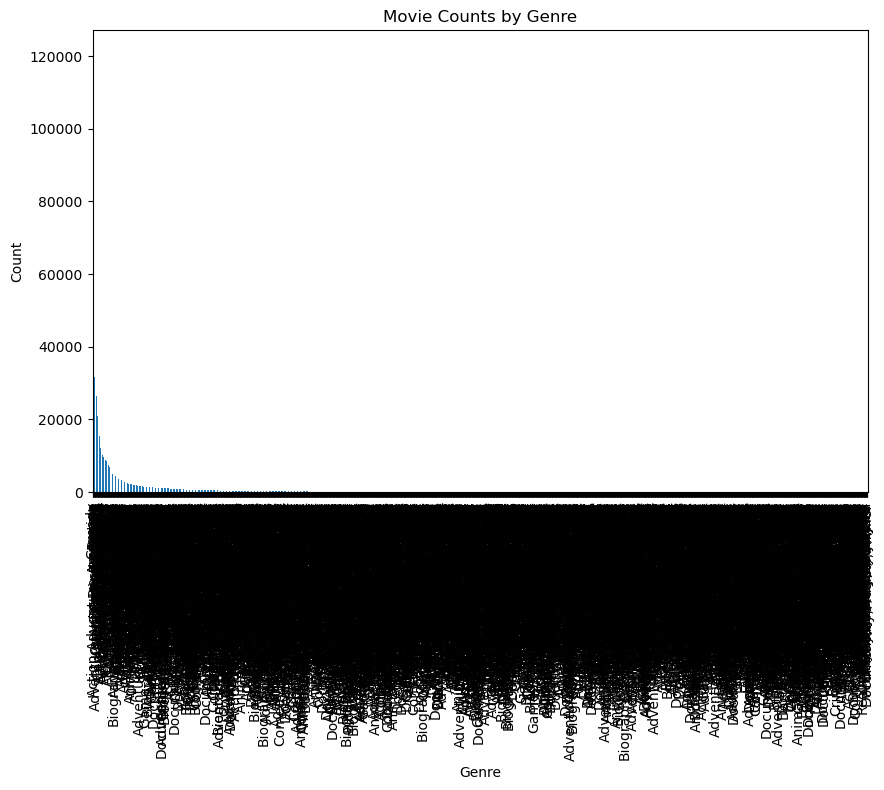

In [15]:
genre_counts = movies_with_ratings_pd['genres'].value_counts()
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Movie Counts by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

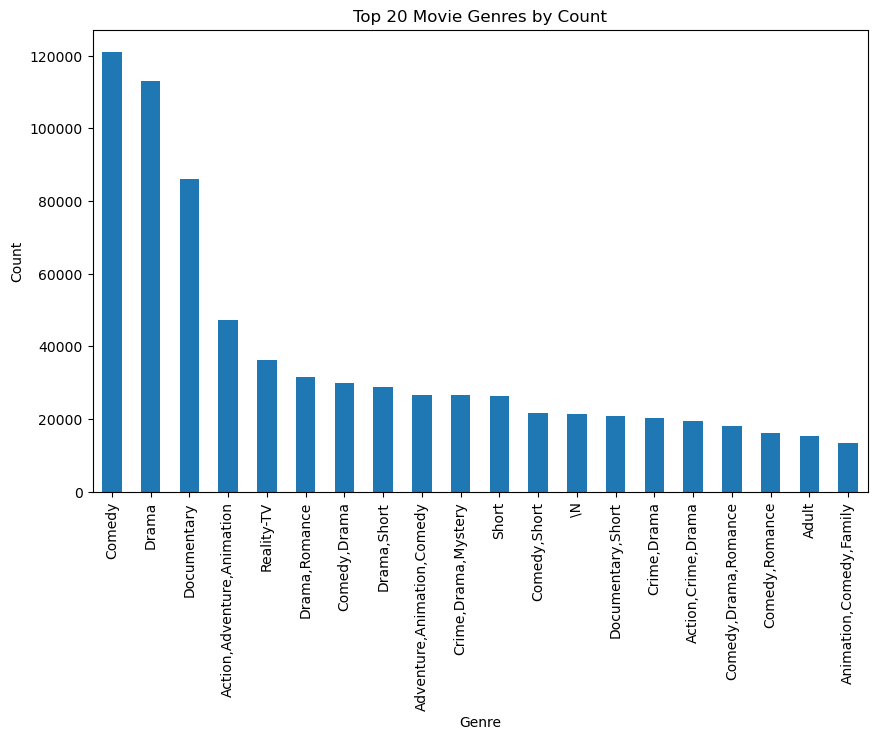

In [21]:
# Count the occurrences of each genre and get the top 20
top_20_genres = movies_with_ratings_pd['genres'].value_counts().head(20)

# Plot the top 20 genres as a bar chart
top_20_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Movie Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


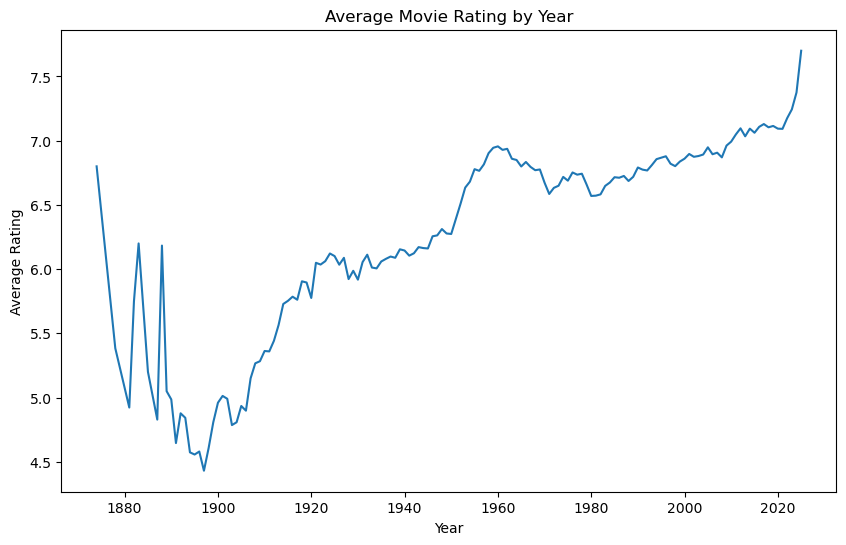

In [16]:
movies_with_ratings_pd['startYear'] = pd.to_numeric(movies_with_ratings_pd['startYear'], errors='coerce')
ratings_by_year = movies_with_ratings_pd.groupby('startYear')['averageRating'].mean()
ratings_by_year.plot(kind='line', figsize=(10,6))
plt.title('Average Movie Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


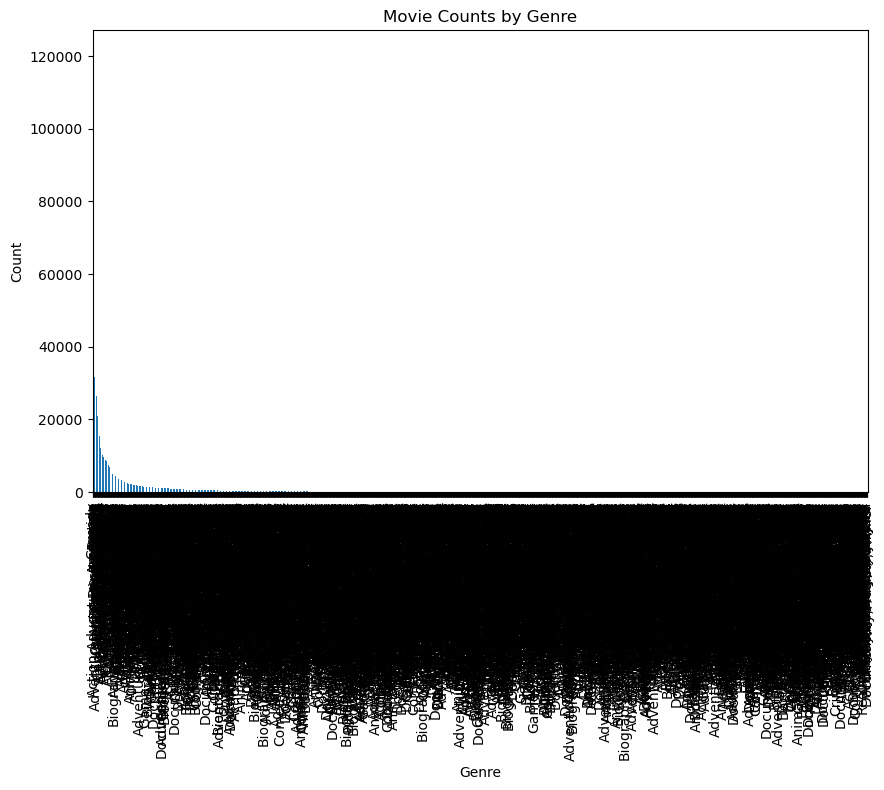

In [17]:
genre_counts = movies_with_ratings_pd['genres'].value_counts()
genre_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Movie Counts by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

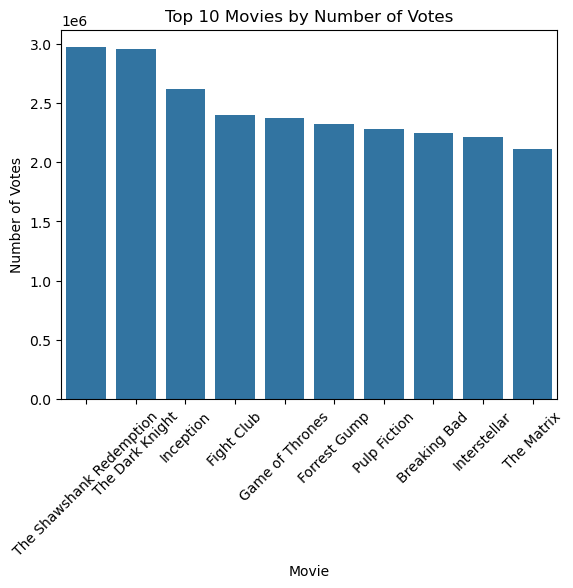

In [20]:
top_voted_movies = movies_with_ratings_pd.sort_values('numVotes', ascending=False).head(10)
sns.barplot(x='primaryTitle', y='numVotes', data=top_voted_movies)
plt.title('Top 10 Movies by Number of Votes')
plt.xlabel('Movie')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()


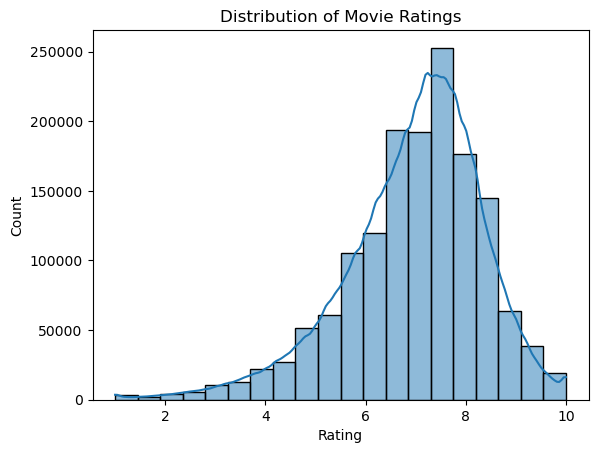

In [4]:
title_ratings_df_pd = title_ratings_df.toPandas()

# Plotting the distribution of movie ratings
sns.histplot(title_ratings_df_pd['averageRating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Collaborative Filtering model using the Alternating Least Squares (ALS) algorithm 

In [8]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Generate a synthetic user_id based on the movie ID
movies_with_ratings = movies_with_ratings.withColumn('user_id', F.row_number().over(Window.orderBy("tconst")))

# Create a numeric movie_id by assigning a unique number to each movie
movie_id_mapping = movies_with_ratings.select("tconst").distinct().withColumn("movie_id", F.row_number().over(Window.orderBy("tconst")))

# Join the mapping back to the movies_with_ratings DataFrame
movies_with_ratings = movies_with_ratings.join(movie_id_mapping, on="tconst", how="left")

# Prepare the ratings data for ALS (user_id, movie_id as item, averageRating as rating)
ratings_df = movies_with_ratings.select('user_id', 'movie_id', 'averageRating')

# Show the prepared DataFrame
ratings_df.show(5)


24/12/06 10:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:38:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

+-------+--------+-------------+
|user_id|movie_id|averageRating|
+-------+--------+-------------+
|      1|       1|          5.7|
|      2|       2|          5.6|
|      3|       3|          6.5|
|      4|       4|          5.4|
|      5|       5|          6.2|
+-------+--------+-------------+
only showing top 5 rows



As tconst is string daa type and ALS requires the numeric type we convert tconst to numeric
Steps to Convert tconst to Numeric IDs
1Create a Mapping: Map the tconst (movie ID) to a numeric ID using the StringIndexer from Spark.
2Apply the Indexing: Replace the tconst column with the new numeric ID column.


In [12]:
train_data, test_data = ratings_df.randomSplit([0.8, 0.2], seed=42)

print("Number of rows in test_data:", test_data.count())
# Verify data is properly prepared
print("Train data count:", train_data.count())
print("Test data count:", test_data.count())

# Check for distinct users and items
print("Distinct users:", train_data.select("user_id").distinct().count())
print("Distinct items:", train_data.select("movie_id").distinct().count())

24/12/06 10:49:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:39 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

Number of rows in test_data: 301211


24/12/06 10:49:45 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 195.4 MiB so far)
24/12/06 10:49:46 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 126.5 MiB so far)
24/12/06 10:49:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, t

Train data count: 1205539


24/12/06 10:49:52 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 195.4 MiB so far)
24/12/06 10:49:52 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 83.8 MiB so far)
24/12/06 10:49:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:52 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, th

Test data count: 301211


24/12/06 10:49:58 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 195.4 MiB so far)
24/12/06 10:49:58 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 83.8 MiB so far)
24/12/06 10:49:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:49:58 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, th

Distinct users: 1205539


24/12/06 10:50:04 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 195.4 MiB so far)
24/12/06 10:50:04 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 83.8 MiB so far)
24/12/06 10:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:50:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, th

Distinct items: 1205539


In [ ]:
print("Sample data:")
train_data.show(5)
test_data.show(5)

# Ensure no null values in key columns
train_data = train_data.na.drop(subset=["user_id", "movie_id", "averageRating"])

Sample data:


24/12/06 10:52:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:10 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

+-------+--------+-------------+
|user_id|movie_id|averageRating|
+-------+--------+-------------+
|      1|       1|          5.7|
|      2|       2|          5.6|
|      4|       4|          5.4|
|      5|       5|          6.2|
|      6|       6|          5.0|
+-------+--------+-------------+
only showing top 5 rows



24/12/06 10:52:16 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 195.4 MiB so far)
24/12/06 10:52:17 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 126.5 MiB so far)
24/12/06 10:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, t

+-------+--------+-------------+
|user_id|movie_id|averageRating|
+-------+--------+-------------+
|      3|       3|          6.5|
|      7|       7|          5.4|
|      9|       9|          5.4|
|     14|      14|          7.1|
|     20|      20|          4.7|
+-------+--------+-------------+
only showing top 5 rows



In [18]:
# Check user_id overlap
train_user_ids = train_data.select("user_id").distinct()
test_user_ids = test_data.select("user_id").distinct()
missing_users = test_user_ids.subtract(train_user_ids)
print("Missing users in training data:", missing_users.count())

# Check movie_id overlap
train_movie_ids = train_data.select("movie_id").distinct()
test_movie_ids = test_data.select("movie_id").distinct()
missing_movies = test_movie_ids.subtract(train_movie_ids)
print("Missing movies in training data:", missing_movies.count())


24/12/06 10:56:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:56:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:56:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:56:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:56:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:56:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

Missing users in training data: 301211


24/12/06 10:57:04 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 300.4 MiB so far)
24/12/06 10:57:04 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 52.0 MiB so far)
24/12/06 10:57:04 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 21.3 MiB so far)
24/12/06 10:57:04 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_143_0 in memory.
24/12/06 10:57:04 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 384.0 B so far)
24/12/06 10:57:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:57:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:57:05 WARN WindowExec: No Partition Defined for Window operation! Moving all data to

Missing movies in training data: 301211


In [19]:
# Filter test data
test_data = test_data.join(train_user_ids, "user_id", "inner")
test_data = test_data.join(train_movie_ids, "movie_id", "inner")


In [20]:
# Check ratings per user
ratings_per_user = ratings_df.groupBy("user_id").count()
ratings_per_user.show()

# Check ratings per movie
ratings_per_movie = ratings_df.groupBy("movie_id").count()
ratings_per_movie.show()


24/12/06 10:59:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:07 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

+-------+-----+
|user_id|count|
+-------+-----+
|      1|    1|
|      2|    1|
|      3|    1|
|      4|    1|
|      5|    1|
|      6|    1|
|      7|    1|
|      8|    1|
|      9|    1|
|     10|    1|
|     11|    1|
|     12|    1|
|     13|    1|
|     14|    1|
|     15|    1|
|     16|    1|
|     17|    1|
|     18|    1|
|     19|    1|
|     20|    1|
+-------+-----+
only showing top 20 rows



24/12/06 10:59:13 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 195.4 MiB so far)
24/12/06 10:59:13 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 83.8 MiB so far)
24/12/06 10:59:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 10:59:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, th

+--------+-----+
|movie_id|count|
+--------+-----+
|  139128|    1|
|  195367|    1|
|  265189|    1|
|  320632|    1|
|  323095|    1|
|  400440|    1|
|  590146|    1|
|  601901|    1|
|  811238|    1|
|  864987|    1|
|  909833|    1|
|  958551|    1|
|  973473|    1|
|  975196|    1|
| 1018724|    1|
| 1068695|    1|
| 1090095|    1|
| 1091376|    1|
| 1149627|    1|
| 1207931|    1|
+--------+-----+
only showing top 20 rows



The output confirms two major issues with the dataset:

Cold Start Problem:

301,211 missing users and 301,211 missing movies in the test dataset compared to the training dataset indicate a lack of overlap between training and testing data. The ALS model cannot make predictions for users or movies it hasn't seen during training.
Sparse Data:

Each user_id and movie_id has exactly one rating. This extreme sparsity limits the model's ability to learn meaningful relationships between users and movies.
Fixing the Issues

In [23]:
#Fixing the Issues
#1. Ensure Overlap Between Training and Testing Sets
# Ensure test data has users and movies present in training data
valid_user_ids = ratings_df.select("user_id").distinct()
valid_movie_ids = ratings_df.select("movie_id").distinct()

# Split data with overlap
train_data, test_data = ratings_df.randomSplit([0.8, 0.2], seed=42)

test_data = test_data.join(valid_user_ids, "user_id", "inner").join(valid_movie_ids, "movie_id", "inner")


In [25]:
#2. Filter Users and Movies with Very Few Ratings
#Users and movies with only a single rating do not provide enough data for meaningful predictions. 
#Filter out users and movies with fewer than a minimum number of ratings (e.g., 5)
# Minimum ratings threshold
min_ratings = 5

# Filter users and movies with enough ratings
valid_users = ratings_per_user.filter(F.col("count") >= min_ratings).select("user_id")
valid_movies = ratings_per_movie.filter(F.col("count") >= min_ratings).select("movie_id")

filtered_ratings_df = ratings_df.join(valid_users, "user_id", "inner").join(valid_movies, "movie_id", "inner")


In [26]:
train_data, test_data = filtered_ratings_df.randomSplit([0.8, 0.2], seed=42)


**ALS**

In [27]:
from pyspark.sql import functions as F
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.window import Window

# Assuming you have already loaded the data into ratings_df
# Random split of the data into training and testing sets
train_data, test_data = ratings_df.randomSplit([0.8, 0.2], seed=42)

print("Number of rows in test_data:", test_data.count())

# Model training using ALS
als = ALS(
    rank=5,  # Reduce rank to handle sparse data
    maxIter=15,
    regParam=0.1,  # Increase regularization
    userCol="user_id",
    itemCol="movie_id",
    ratingCol="averageRating",
    coldStartStrategy="drop",
    implicitPrefs=False
)

model = als.fit(train_data)

# Instead of accessing maxIter, print the ALS parameters used
print("ALS model parameters:")
print(f"Rank: {als.getRank()}")
print(f"Max Iterations: {als.getMaxIter()}")
print(f"Regularization Parameter: {als.getRegParam()}")

# Making predictions
predictions = model.transform(test_data)

if predictions.isEmpty():
    print("Predictions DataFrame is empty")
else:
    predictions.printSchema()
    predictions.show(5)

    # Handle NaN or dropped values
    predictions = predictions.na.drop(subset=["prediction"])

    # Ensure that you are predicting the 'averageRating' column correctly in the evaluator
    evaluator = RegressionEvaluator(
        metricName="rmse", 
        labelCol="averageRating",
        predictionCol="prediction"
    )

    # Evaluate the model using RMSE
    if predictions.count() > 0:
        rmse = evaluator.evaluate(predictions)
        print(f"Root-Mean-Square Error (RMSE) on test data = {rmse}")
    else:
        print("Error: Predictions DataFrame is empty after handling NaN values. Unable to evaluate the model.")

# Optional: Generate top N recommendations for users
def get_top_n_recommendations(model, users_df, n=10):
    """
    Generate top N movie recommendations for each user
    
    :param model: Trained ALS model
    :param users_df: DataFrame containing unique user IDs
    :param n: Number of top recommendations to generate
    :return: DataFrame with user recommendations
    """
    userRecs = model.recommendForUserSubset(users_df.select("user_id"), n)
    return userRecs


24/12/06 11:04:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

Number of rows in test_data: 301211


24/12/06 11:04:51 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 300.4 MiB so far)
24/12/06 11:04:51 WARN MemoryStore: Failed to reserve initial memory threshold of 1024.0 KiB for computing block rdd_143_0 in memory.
24/12/06 11:04:51 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 384.0 B so far)
24/12/06 11:04:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:04:51 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance

ALS model parameters:
Rank: 5
Max Iterations: 15
Regularization Parameter: 0.1


24/12/06 11:05:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:05:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:05:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:05:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:05:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:05:12 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

Predictions DataFrame is empty


In [28]:
predictions = model.transform(test_data).na.drop(subset=["prediction"])
if predictions.count() > 0:
    rmse = evaluator.evaluate(predictions)
    print(f"Root-Mean-Square Error (RMSE) on test data = {rmse}")
else:
    print("No valid predictions after filtering.")


24/12/06 11:06:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:06:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:06:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:06:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:06:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 11:06:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 1

No valid predictions after filtering.


1)StringIndexer: This creates a new column item_id, where each unique tconst (movie ID) is mapped to a unique numeric ID.

2)ALS Model: The model now uses the item_id column, which is numeric, as the itemCol instead of the tconst.

3)Recommendations: The model will now generate movie recommendations using numeric item IDs, which is what the ALS algorithm expects.

***
ALS continues to fail due to the dataset's sparsity
Therefore lets try cotent based filtering 



##Content based filtering ##

In [29]:
# Replace '\N' with None and cast numeric columns
movies_with_ratings = movies_with_ratings.replace('\\N', None)
movies_with_ratings = movies_with_ratings.withColumn("runtimeMinutes", F.col("runtimeMinutes").cast("double"))
movies_with_ratings = movies_with_ratings.withColumn("startYear", F.col("startYear").cast("int"))


In [ ]:
movies_with_ratings.select("runtimeMinutes", "startYear", "averageRating", "numVotes", "num_actors_directors").show(10)


24/12/06 11:55:30 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 300.4 MiB so far)
24/12/06 11:55:31 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 11:55:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 11:55:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 11:55:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 11:55:34 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 11:55:36 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 11:55:37 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
24/12/06 11:55:38 WARN RowBasedKeyValueBatch: Calling spill() on RowBa

+--------------+---------+-------------+--------+--------------------+
|runtimeMinutes|startYear|averageRating|numVotes|num_actors_directors|
+--------------+---------+-------------+--------+--------------------+
|           1.0|     1894|          5.4|    2254|                   3|
|           2.0|     1894|          6.1|    1238|                   1|
|           1.0|     1895|          4.6|     364|                   4|
|           0.0|     1898|          5.1|      32|                   1|
|           0.0|     1896|          3.6|      36|                   1|
|           0.0|     1896|          4.2|      34|                   2|
|           0.0|     1896|          3.2|      30|                   1|
|           0.0|     1896|          4.8|      35|                   1|
|           1.0|     1896|          4.4|     580|                   2|
|           0.0|     1897|          5.1|      32|                   3|
+--------------+---------+-------------+--------+--------------------+
only s

In [38]:
movies_with_ratings.printSchema()


root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: integer (nullable = false)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: double (nullable = false)
 |-- genres: string (nullable = true)
 |-- averageRating: double (nullable = false)
 |-- numVotes: integer (nullable = false)
 |-- user_id: integer (nullable = false)
 |-- movie_id: integer (nullable = true)
 |-- genresIndex: double (nullable = false)
 |-- genresVec: vector (nullable = true)
 |-- num_actors_directors: integer (nullable = false)
 |-- numerical_features: vector (nullable = true)



In [ ]:
#Scaling/Normalization:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col

# Selecting numerical columns to scale
numerical_cols = ["runtimeMinutes", "averageRating", "numVotes"]

# Assembling these features into a single vector column
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="num_features")
movies_with_ratings = assembler.transform(movies_with_ratings)

# Scaling the numerical features
scaler = StandardScaler(inputCol="num_features", outputCol="scaled_features", withStd=True, withMean=False)
scaler_model = scaler.fit(movies_with_ratings)
movies_with_ratings = scaler_model.transform(movies_with_ratings)

# Show the scaled features
movies_with_ratings.select("scaled_features").show(10)


IllegalArgumentException: Data type string of column runtimeMinutes is not supported.

In [17]:
# Check for null values in the selected numerical columns
for col_name in numerical_cols:
    missing_values = movies_with_ratings.filter(col(col_name).isNull()).count()
    print(f"Missing values in {col_name}: {missing_values}")


Missing values in runtimeMinutes: 450202


Missing values in averageRating: 0


Missing values in numVotes: 0


In [18]:
# Fill null values in numerical columns with 0 or the mean
for col_name in numerical_cols:
    # Fill with the mean of the column
    mean_value = movies_with_ratings.agg(F.mean(col_name)).collect()[0][0]
    if mean_value is not None:
        movies_with_ratings = movies_with_ratings.fillna({col_name: mean_value})

# Alternatively, fill with zero for simplicity
# movies_with_ratings = movies_with_ratings.fillna({col_name: 0})


24/12/06 14:42:39 WARN MemoryStore: Not enough space to cache broadcast_224 in memory! (computed 180.0 MiB so far)
24/12/06 14:42:39 WARN BlockManager: Persisting block broadcast_224 to disk instead.


In [20]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.sql.functions import col

# Cast the relevant columns to numerical types (e.g., float or int)
movies_with_ratings = movies_with_ratings.withColumn("runtimeMinutes", col("runtimeMinutes").cast("double")) \
                                         .withColumn("averageRating", col("averageRating").cast("double")) \
                                         .withColumn("numVotes", col("numVotes").cast("double"))

# Selecting numerical columns to scale
numerical_cols = ["runtimeMinutes", "averageRating", "numVotes"]

# Assembling the numerical columns into a single vector column with a new output column name
assembler = VectorAssembler(inputCols=numerical_cols, outputCol="num_features_scaled")
movies_with_ratings = assembler.transform(movies_with_ratings)

# Scaling the numerical features
scaler = StandardScaler(inputCol="num_features_scaled", outputCol="scaled_features", withStd=True, withMean=False)
scaler_model = scaler.fit(movies_with_ratings)
movies_with_ratings = scaler_model.transform(movies_with_ratings)

# Show the scaled features
movies_with_ratings.select("scaled_features").show(10)



+--------------------+
|     scaled_features|
+--------------------+
|[0.01109950842615...|
|[0.61488981030744...|
|[0.61488981030744...|
|[0.02219901685231...|
|[0.09989557583539...|
|[0.18869164324464...|
|[0.61488981030744...|
|[3.32985252784662...|
|[0.61488981030744...|
|[0.55497542130777...|
+--------------------+
only showing top 10 rows



In [22]:
#Vectorizing Categorical Features:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

# Example: If titleType is categorical, you can index it first
indexer = StringIndexer(inputCol="titleType", outputCol="titleTypeIndex")
movies_with_ratings = indexer.fit(movies_with_ratings).transform(movies_with_ratings)

# Now, apply OneHotEncoder if necessary
encoder = OneHotEncoder(inputCol="titleTypeIndex", outputCol="titleTypeVec")
movies_with_ratings = encoder.fit(movies_with_ratings).transform(movies_with_ratings)

# Show the encoded feature
movies_with_ratings.select("titleTypeVec").show(10)


+-------------+
| titleTypeVec|
+-------------+
|(9,[2],[1.0])|
|(9,[2],[1.0])|
|(9,[2],[1.0])|
|(9,[2],[1.0])|
|(9,[2],[1.0])|
|(9,[2],[1.0])|
|(9,[1],[1.0])|
|(9,[1],[1.0])|
|(9,[1],[1.0])|
|(9,[1],[1.0])|
+-------------+
only showing top 10 rows



In [51]:
#Categorize runtimeMinutes into bins:
from pyspark.sql.functions import when

movies_with_ratings = movies_with_ratings.withColumn(
    "runtime_category",
    when(col("runtimeMinutes") < 60, "Short")
    .when((col("runtimeMinutes") >= 60) & (col("runtimeMinutes") < 120), "Medium")
    .otherwise("Long")
)


In [53]:
# Drop the existing 'titleTypeIndex' column if it exists
movies_with_ratings = movies_with_ratings.drop("titleTypeIndex")

# Now, apply StringIndexer
indexer = StringIndexer(inputCol="titleType", outputCol="titleTypeIndex")
movies_with_ratings = indexer.fit(movies_with_ratings).transform(movies_with_ratings)

# Show the result
movies_with_ratings.select("titleType", "titleTypeIndex").show(10)


24/12/06 12:43:50 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 300.4 MiB so far)
24/12/06 12:43:56 WARN MemoryStore: Not enough space to cache rdd_143_0 in memory! (computed 300.4 MiB so far)


+---------+--------------+
|titleType|titleTypeIndex|
+---------+--------------+
|    short|           2.0|
|    short|           2.0|
|    short|           2.0|
|    short|           2.0|
|    short|           2.0|
|    short|           2.0|
|    movie|           1.0|
|    movie|           1.0|
|    movie|           1.0|
|    movie|           1.0|
+---------+--------------+
only showing top 10 rows



In [54]:
from pyspark.storagelevel import StorageLevel

# Persist data to disk
movies_with_ratings = movies_with_ratings.persist(StorageLevel.DISK_ONLY)


24/12/06 12:44:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 12:44:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 12:44:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/12/06 12:44:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [59]:
movies_with_ratings = movies_with_ratings.repartition(10)


In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.ml.stat import Correlation
import numpy as np

# Step 1: Combining all features into a single vector column for similarity calculation
assembler = VectorAssembler(inputCols=["scaled_features", "titleTypeVec"], outputCol="combined_features")
movies_with_features = assembler.transform(movies_with_ratings)

# Step 2: Compute the Cosine Similarity between the movie vectors

# Function to compute cosine similarity
def cosine_similarity(v1, v2):
    return float(v1.dot(v2)) / (v1.norm(2) * v2.norm(2))

# Create an RDD of movie IDs and their feature vectors
movie_rdd = movies_with_features.select("tconst", "combined_features").rdd.map(lambda row: (row['tconst'], row['combined_features']))

# Define a function to get recommendations for a given movie ID
def get_movie_recommendations(movie_id, top_n=10):
    target_movie = movies_with_features.filter(movies_with_features["tconst"] == movie_id).first()
    
    if target_movie is None:
        return []  # Movie ID not found
    
    target_features = target_movie["combined_features"]

    # Calculate cosine similarities
    similarities = movie_rdd.map(lambda x: (x[0], cosine_similarity(target_features, x[1])))

    # Find the top N recommendations by sorting the similarities
    top_recommendations = similarities.filter(lambda x: x[0] != movie_id).takeOrdered(top_n, key=lambda x: -x[1])

    # Extract movie IDs and join with the movie titles
    recommended_movie_ids = [rec[0] for rec in top_recommendations]
    
    # Fetch the movie titles efficiently using a DataFrame join
    recommended_movies_df = movies_with_features.filter(movies_with_features["tconst"].isin(recommended_movie_ids)) \
        .select("tconst", "primaryTitle")

    recommended_movies = recommended_movies_df.collect()  # Collect the titles

    return [row['primaryTitle'] for row in recommended_movies]

# Step 3: Example usage - Get recommendations for a specific movie by its tconst (movie ID)
movie_id = 'tt0000109'  # Replace with the movie ID you want to get recommendations for
recommendations = get_movie_recommendations(movie_id)

# Show the recommendations
print(f"Recommended Movies for movie ID {movie_id}:")
for movie in recommendations:
    print(movie)


24/12/06 14:46:30 WARN MemoryStore: Not enough space to cache broadcast_271 in memory! (computed 202.0 MiB so far)
24/12/06 14:46:30 WARN BlockManager: Persisting block broadcast_271 to disk instead.
24/12/06 14:46:41 WARN MemoryStore: Not enough space to cache broadcast_276 in memory! (computed 202.0 MiB so far)
24/12/06 14:46:41 WARN BlockManager: Persisting block broadcast_276 to disk instead.


Recommended Movies for movie ID tt0000109:
Awakening of Rip
Rip Leaving Sleepy Hollow
Exit of Rip and the Dwarf
Rip's Toast
President McKinley Taking the Oath
The Interrupted Bathers
The Old Maid's Valentine
The Cock Fight
Pan 698
Faust and Marguerite


In [ ]:
# Step 3: Example usage - Get recommendations for a specific movie by its tconst (movie ID)
movie_id = 'tt0000109'  # Replace with the movie ID you want to get recommendations for
recommendations = get_movie_recommendations(movie_id)

# Show the recommendations
print(f"Recommended Movies for movie ID {movie_id}:")
for movie in recommendations:
    print(movie)


**NCF RNN or autoencoders**


Neural Collaborative Filtering is a deep learning technique designed specifically for recommendation systems. It uses deep neural networks to learn the interaction between users and items, which allows the model to capture complex relationships that traditional methods might miss.



In [9]:
# Load data
ratings_df = pd.read_csv('/Users/aniketmane/Desktop/BigData/project/dataset/title.ratings.tsv.gz', sep='\t',low_memory=False)
movies_df = pd.read_csv('/Users/aniketmane/Desktop/BigData/project/dataset/title.basics.tsv.gz', sep='\t',low_memory=False)


In [4]:
print(ratings_df.columns)


Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


In [10]:
# Merge ratings with movie details
ratings_with_movie_details = ratings_df.merge(movies_df, left_on='tconst', right_on='tconst')


In [ ]:

print(ratings_df.columns)
print(movies_df.columns)

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')
Index(['tconst', 'averageRating', 'numVotes'], dtype='object')


In [11]:
principals_df = pd.read_csv('/Users/aniketmane/Desktop/BigData/project/dataset/title.principals.tsv.gz', sep='\t',low_memory=False)


In [8]:
print(principals_df.columns)

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')


In [12]:
ratings_with_movie_details = ratings_df.merge(principals_df[['nconst', 'tconst']], on='tconst')

In [10]:
print(ratings_with_movie_details.columns)


Index(['tconst', 'averageRating', 'numVotes', 'nconst'], dtype='object')


In [13]:
print(ratings_with_movie_details.isnull().sum())


tconst           0
averageRating    0
numVotes         0
nconst           0
dtype: int64


In [14]:
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dense, Concatenate, Flatten, Input
from sklearn.model_selection import train_test_split

# Create user-item interaction matrix (nconst as user, tconst as item)
user_movie_interaction = ratings_with_movie_details[['nconst', 'tconst', 'averageRating']]

# Prepare training data for NCF model (mapping nconst and tconst to indices)
user_mapping = {user: idx for idx, user in enumerate(user_movie_interaction['nconst'].unique())}
item_mapping = {item: idx for idx, item in enumerate(user_movie_interaction['tconst'].unique())}

user_movie_interaction['user'] = user_movie_interaction['nconst'].map(user_mapping)
user_movie_interaction['item'] = user_movie_interaction['tconst'].map(item_mapping)

# Prepare features for the NCF model
user_input = user_movie_interaction['user']
item_input = user_movie_interaction['item']
ratings = user_movie_interaction['averageRating']

# Train-test split (Make sure to split them into separate arrays, not a list of arrays)
X_train_user, X_test_user, X_train_item, X_test_item, y_train, y_test = train_test_split(user_input, item_input, ratings, test_size=0.2)

# Build the NCF model
user_input_layer = Input(shape=(1,))
item_input_layer = Input(shape=(1,))

user_embedding = Embedding(input_dim=len(user_mapping), output_dim=50)(user_input_layer)
item_embedding = Embedding(input_dim=len(item_mapping), output_dim=50)(item_input_layer)

# Concatenate the embeddings
merged = Concatenate()([user_embedding, item_embedding])
merged = Flatten()(merged)

# Dense layers
dense = Dense(128, activation='relu')(merged)
output = Dense(1)(dense)

# Model compilation
model = Model(inputs=[user_input_layer, item_input_layer], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit([X_train_user, X_train_item], y_train, epochs=5, batch_size=1024)

# Evaluate the model
model.evaluate([X_test_user, X_test_item], y_test)


Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 136628700 elements. This may consume a large amount of memory.
  warnings.warn(


16335/16335 ━━━━━━━━━━━━━━━━━━━━ 9513s 582ms/step - loss: 2.5669
Epoch 2/5
 3407/16335 ━━━━━━━━━━━━━━━━━━━━ 1:23:26 387ms/step - loss: 0.0548

24/12/10 14:47:27 WARN TransportChannelHandler: Exception in connection from /192.168.1.188:62435
java.io.IOException: Operation timed out
	at java.base/sun.nio.ch.SocketDispatcher.read0(Native Method)
	at java.base/sun.nio.ch.SocketDispatcher.read(SocketDispatcher.java:47)
	at java.base/sun.nio.ch.IOUtil.readIntoNativeBuffer(IOUtil.java:341)
	at java.base/sun.nio.ch.IOUtil.read(IOUtil.java:295)
	at java.base/sun.nio.ch.IOUtil.read(IOUtil.java:270)
	at java.base/sun.nio.ch.SocketChannelImpl.implRead(SocketChannelImpl.java:426)
	at java.base/sun.nio.ch.SocketChannelImpl.read(SocketChannelImpl.java:493)
	at io.netty.buffer.PooledByteBuf.setBytes(PooledByteBuf.java:254)
	at io.netty.buffer.AbstractByteBuf.writeBytes(AbstractByteBuf.java:1132)
	at io.netty.channel.socket.nio.NioSocketChannel.doReadBytes(NioSocketChannel.java:357)
	at io.netty.channel.nio.AbstractNioByteChannel$NioByteUnsafe.read(AbstractNioByteChannel.java:151)
	at io.netty.channel.nio.NioEventLoop.processSelectedKey(NioEv

16335/16335 ━━━━━━━━━━━━━━━━━━━━ 7483s 458ms/step - loss: 0.0439
Epoch 3/5
16335/16335 ━━━━━━━━━━━━━━━━━━━━ 20723s 1s/step - loss: 0.0110
Epoch 4/5
16335/16335 ━━━━━━━━━━━━━━━━━━━━ 13143s 805ms/step - loss: 0.0047
Epoch 5/5
 7710/16335 ━━━━━━━━━━━━━━━━━━━━ 6:19:51 3s/step - loss: 0.0028

24/12/11 07:34:06 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 932828 ms exceeds timeout 120000 ms
24/12/11 07:34:06 WARN SparkContext: Killing executors is not supported by current scheduler.


 7736/16335 ━━━━━━━━━━━━━━━━━━━━ 6:17:36 3s/step - loss: 0.0028

24/12/11 07:34:16 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7767/16335 ━━━━━━━━━━━━━━━━━━━━ 6:14:55 3s/step - loss: 0.0028

24/12/11 07:34:25 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7797/16335 ━━━━━━━━━━━━━━━━━━━━ 6:12:21 3s/step - loss: 0.0028

24/12/11 07:34:35 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7828/16335 ━━━━━━━━━━━━━━━━━━━━ 6:09:43 3s/step - loss: 0.0028

24/12/11 07:34:45 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7856/16335 ━━━━━━━━━━━━━━━━━━━━ 6:07:21 3s/step - loss: 0.0028

24/12/11 07:34:55 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7885/16335 ━━━━━━━━━━━━━━━━━━━━ 6:04:56 3s/step - loss: 0.0028

24/12/11 07:35:05 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7914/16335 ━━━━━━━━━━━━━━━━━━━━ 6:05:28 3s/step - loss: 0.0028

24/12/11 07:38:02 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7944/16335 ━━━━━━━━━━━━━━━━━━━━ 6:02:58 3s/step - loss: 0.0028

24/12/11 07:38:12 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 7974/16335 ━━━━━━━━━━━━━━━━━━━━ 6:00:29 3s/step - loss: 0.0028

24/12/11 07:38:22 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8005/16335 ━━━━━━━━━━━━━━━━━━━━ 5:57:56 3s/step - loss: 0.0028

24/12/11 07:38:32 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8035/16335 ━━━━━━━━━━━━━━━━━━━━ 5:55:29 3s/step - loss: 0.0028

24/12/11 07:38:42 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8063/16335 ━━━━━━━━━━━━━━━━━━━━ 5:56:56 3s/step - loss: 0.0028

24/12/11 07:42:28 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8094/16335 ━━━━━━━━━━━━━━━━━━━━ 5:54:24 3s/step - loss: 0.0028

24/12/11 07:42:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8124/16335 ━━━━━━━━━━━━━━━━━━━━ 5:51:58 3s/step - loss: 0.0028

24/12/11 07:42:48 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8154/16335 ━━━━━━━━━━━━━━━━━━━━ 5:49:34 3s/step - loss: 0.0028

24/12/11 07:42:58 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8182/16335 ━━━━━━━━━━━━━━━━━━━━ 6:00:07 3s/step - loss: 0.0028

24/12/11 07:55:58 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8212/16335 ━━━━━━━━━━━━━━━━━━━━ 5:57:39 3s/step - loss: 0.0028

24/12/11 07:56:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8243/16335 ━━━━━━━━━━━━━━━━━━━━ 5:55:07 3s/step - loss: 0.0028

24/12/11 07:56:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8273/16335 ━━━━━━━━━━━━━━━━━━━━ 5:52:41 3s/step - loss: 0.0028

24/12/11 07:56:28 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8303/16335 ━━━━━━━━━━━━━━━━━━━━ 5:50:15 3s/step - loss: 0.0028

24/12/11 07:56:38 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8333/16335 ━━━━━━━━━━━━━━━━━━━━ 5:49:37 3s/step - loss: 0.0028

24/12/11 07:58:39 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8364/16335 ━━━━━━━━━━━━━━━━━━━━ 5:47:08 3s/step - loss: 0.0028

24/12/11 07:58:49 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8394/16335 ━━━━━━━━━━━━━━━━━━━━ 5:44:45 3s/step - loss: 0.0028

24/12/11 07:58:59 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8425/16335 ━━━━━━━━━━━━━━━━━━━━ 5:42:18 3s/step - loss: 0.0028

24/12/11 07:59:09 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8454/16335 ━━━━━━━━━━━━━━━━━━━━ 5:40:02 3s/step - loss: 0.0028

24/12/11 07:59:19 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8483/16335 ━━━━━━━━━━━━━━━━━━━━ 5:37:46 3s/step - loss: 0.0028

24/12/11 07:59:29 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8510/16335 ━━━━━━━━━━━━━━━━━━━━ 5:35:42 3s/step - loss: 0.0028

24/12/11 07:59:39 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8538/16335 ━━━━━━━━━━━━━━━━━━━━ 5:35:27 3s/step - loss: 0.0028

24/12/11 08:01:54 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8569/16335 ━━━━━━━━━━━━━━━━━━━━ 5:33:04 3s/step - loss: 0.0028

24/12/11 08:02:04 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8599/16335 ━━━━━━━━━━━━━━━━━━━━ 5:30:46 3s/step - loss: 0.0028

24/12/11 08:02:14 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8629/16335 ━━━━━━━━━━━━━━━━━━━━ 5:28:30 3s/step - loss: 0.0028

24/12/11 08:02:24 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8659/16335 ━━━━━━━━━━━━━━━━━━━━ 5:26:14 3s/step - loss: 0.0028

24/12/11 08:02:34 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8685/16335 ━━━━━━━━━━━━━━━━━━━━ 5:24:18 3s/step - loss: 0.0028

24/12/11 08:02:44 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8713/16335 ━━━━━━━━━━━━━━━━━━━━ 5:22:13 3s/step - loss: 0.0028

24/12/11 08:02:54 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 8741/16335 ━━━━━━━━━━━━━━━━━━━━ 5:20:09 3s/step - loss: 0.0028

24/12/11 08:03:04 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8770/16335 ━━━━━━━━━━━━━━━━━━━━ 5:22:45 3s/step - loss: 0.0028

24/12/11 08:08:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8801/16335 ━━━━━━━━━━━━━━━━━━━━ 5:20:26 3s/step - loss: 0.0028

24/12/11 08:08:53 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8831/16335 ━━━━━━━━━━━━━━━━━━━━ 5:18:13 3s/step - loss: 0.0028

24/12/11 08:09:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8862/16335 ━━━━━━━━━━━━━━━━━━━━ 5:15:56 3s/step - loss: 0.0028

24/12/11 08:09:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8892/16335 ━━━━━━━━━━━━━━━━━━━━ 5:13:44 3s/step - loss: 0.0028

24/12/11 08:09:23 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8921/16335 ━━━━━━━━━━━━━━━━━━━━ 5:11:38 3s/step - loss: 0.0028

24/12/11 08:09:33 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8949/16335 ━━━━━━━━━━━━━━━━━━━━ 5:09:38 3s/step - loss: 0.0028

24/12/11 08:09:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 8977/16335 ━━━━━━━━━━━━━━━━━━━━ 5:16:02 3s/step - loss: 0.0028

24/12/11 08:20:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9007/16335 ━━━━━━━━━━━━━━━━━━━━ 5:13:50 3s/step - loss: 0.0028

24/12/11 08:20:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9036/16335 ━━━━━━━━━━━━━━━━━━━━ 5:11:43 3s/step - loss: 0.0028

24/12/11 08:20:28 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 9066/16335 ━━━━━━━━━━━━━━━━━━━━ 5:09:32 3s/step - loss: 0.0028

24/12/11 08:20:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 9097/16335 ━━━━━━━━━━━━━━━━━━━━ 5:07:18 3s/step - loss: 0.0028

24/12/11 08:20:48 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

 9126/16335 ━━━━━━━━━━━━━━━━━━━━ 5:05:14 3s/step - loss: 0.0028

24/12/11 08:20:58 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9155/16335 ━━━━━━━━━━━━━━━━━━━━ 5:03:10 3s/step - loss: 0.0028

24/12/11 08:21:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9184/16335 ━━━━━━━━━━━━━━━━━━━━ 5:06:06 3s/step - loss: 0.0028

24/12/11 08:27:40 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9212/16335 ━━━━━━━━━━━━━━━━━━━━ 5:04:05 3s/step - loss: 0.0028

24/12/11 08:27:50 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9243/16335 ━━━━━━━━━━━━━━━━━━━━ 5:01:53 3s/step - loss: 0.0028

24/12/11 08:28:00 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9274/16335 ━━━━━━━━━━━━━━━━━━━━ 4:59:41 3s/step - loss: 0.0028

24/12/11 08:28:10 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9304/16335 ━━━━━━━━━━━━━━━━━━━━ 4:57:34 3s/step - loss: 0.0028

24/12/11 08:28:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9333/16335 ━━━━━━━━━━━━━━━━━━━━ 4:57:31 3s/step - loss: 0.0028

24/12/11 08:31:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9364/16335 ━━━━━━━━━━━━━━━━━━━━ 4:55:21 3s/step - loss: 0.0028

24/12/11 08:31:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9394/16335 ━━━━━━━━━━━━━━━━━━━━ 4:53:16 3s/step - loss: 0.0028

24/12/11 08:31:28 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9425/16335 ━━━━━━━━━━━━━━━━━━━━ 4:51:07 3s/step - loss: 0.0028

24/12/11 08:31:38 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9455/16335 ━━━━━━━━━━━━━━━━━━━━ 4:49:03 3s/step - loss: 0.0028

24/12/11 08:31:48 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

 9484/16335 ━━━━━━━━━━━━━━━━━━━━ 4:49:22 3s/step - loss: 0.0028

24/12/11 08:35:08 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

16335/16335 ━━━━━━━━━━━━━━━━━━━━ 29909s 2s/step - loss: 0.0027
130677/130677 ━━━━━━━━━━━━━━━━━━━━ 29s 221us/step - loss: 0.0067


0.00687778415158391

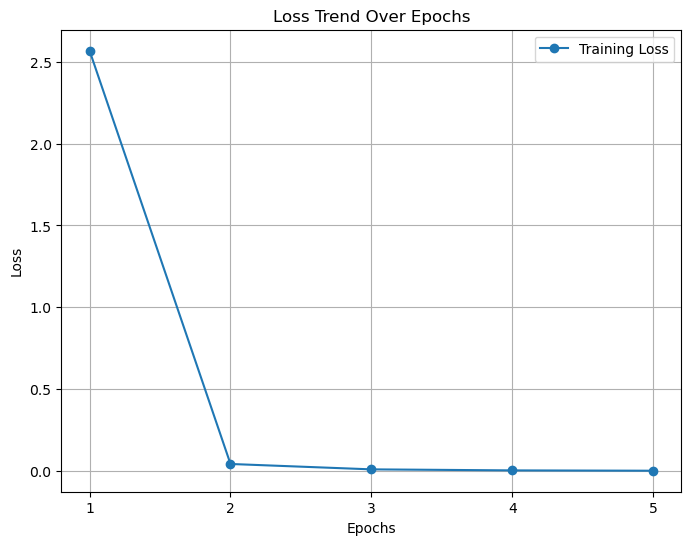

In [16]:
#Loss vizualisation 

import matplotlib.pyplot as plt

# Loss values for each epoch
epochs = [1, 2, 3, 4, 5]
loss_values = [2.5669, 0.0439, 0.0110, 0.0047, 0.0027]

# Plot the loss values
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss_values, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend Over Epochs')
plt.xticks(epochs)  # Ensure each epoch is labeled
plt.grid()
plt.legend()
plt.show()


In [21]:
#RMSE
batch_size = 1024
y_pred = []

for i in range(0, len(X_test_user), batch_size):
    user_batch = X_test_user[i:i+batch_size]
    item_batch = X_test_item[i:i+batch_size]
    y_pred.extend(model.predict([user_batch, item_batch]).flatten())

# Convert predictions to a NumPy array
y_pred = np.array(y_pred)

# Calculate RMSE
rmse = np.sqrt(np.mean((np.array(y_test) - y_pred) ** 2))
print(f"RMSE: {rmse:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
32/32 ━━━━━━━━━━

In [25]:
print(y_pred.shape)  # Should match the length of y_test


(4181650,)


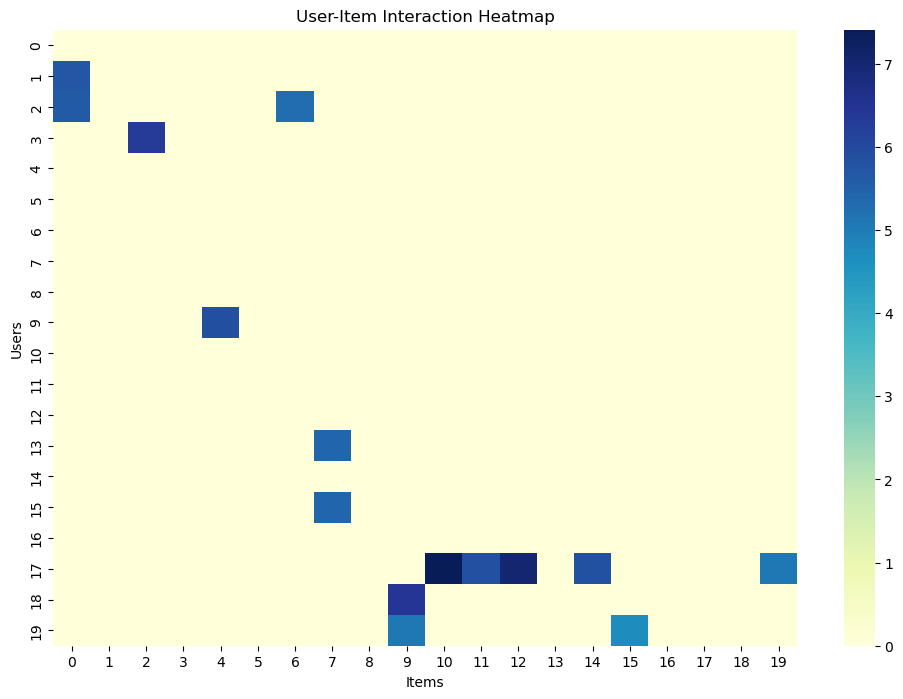

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reshape predictions into a user-item matrix
# Example: Assume `user_input` and `item_input` are user and item IDs from your test set
user_item_matrix = np.zeros((len(user_mapping), len(item_mapping)))

# Populate the matrix with predictions
for user, item, score in zip(X_test_user, X_test_item, y_pred):
    user_item_matrix[user, item] = score

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(user_item_matrix[:20, :20], cmap="YlGnBu", annot=False)  # Show only a small portion (e.g., first 20x20)
plt.title("User-Item Interaction Heatmap")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()


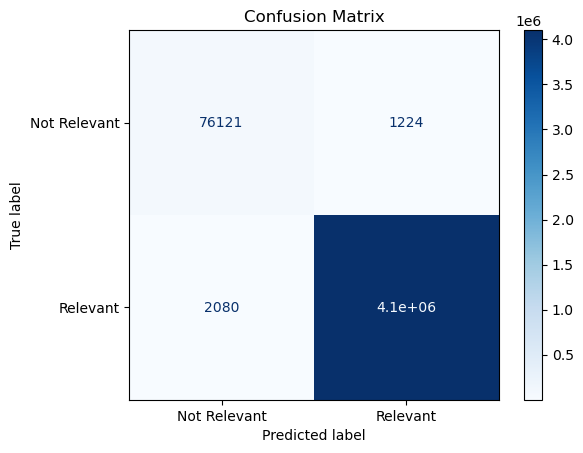

In [ ]:
#Accuracy Matrix (Confusion Matrix Heatmap)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binarize predictions and ground truth
threshold = 3.5  # Define a threshold for relevance
y_pred_binary = (y_pred >= threshold).astype(int)
y_test_binary = (y_test.values >= threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Relevant", "Relevant"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
